# Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
ds = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
ds

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Understanding the data

In [4]:
ds.shape

(205, 26)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
ds.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
ds.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data preprocessing

In [8]:
ds.drop(columns="car_ID", inplace=True)

In [9]:
ds

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [10]:
ds["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [11]:
# # converting from numeric to categorical variable type
ds["symboling"] = ds["symboling"].astype(str)

In [12]:
ds["symboling"].unique()

array(['3', '1', '2', '0', '-1', '-2'], dtype=object)

In [13]:
ds['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [14]:
# extracting car_brand from the values of car_name
ds["car_brand"] = ds['CarName'].str.split(' ', expand=True)[0]

In [15]:
ds["car_brand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
# correcting the typo errors in car_brand values
ds["car_brand"] = ds["car_brand"].replace({"maxda":"mazda",
                               "Nissan":"nissan",
                               "porcshce":"porsche",
                               "toyouta":"toyota",
                               "vokswagen":"volkswagen",
                               "vw":"volkswagen"})

In [17]:
ds["car_brand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
ds.drop(columns="CarName", inplace=True)

In [19]:
ds

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [20]:
# categorizing price into standard and high-end
ds["price_category"] = ds["price"].apply(lambda x: "standard" if x <= 18500 else "high-end")
ds

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand,price_category
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,standard
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,standard
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,standard
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,standard
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,standard
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,high-end
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,high-end
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,high-end


In [21]:
# creating list of numeric and categorical columns
col_numeric = list(ds.select_dtypes(exclude="object"))

col_categorical = list(ds.select_dtypes(include="object"))

# Data Exploration 

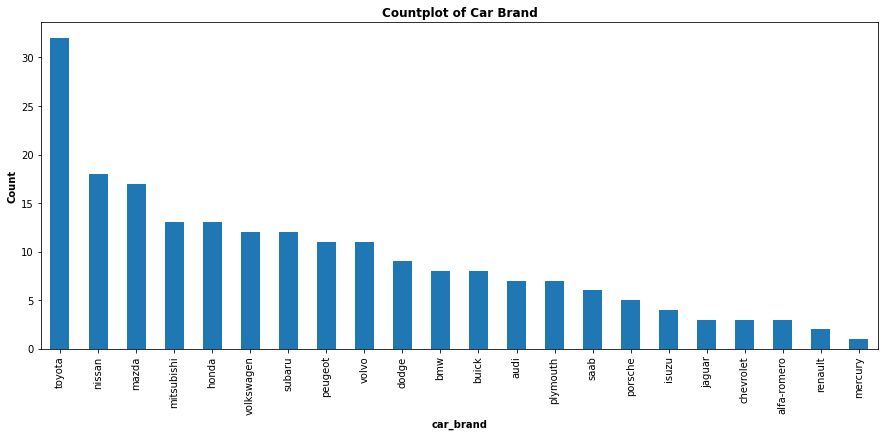

In [22]:
# visualizing the car_brand
plt.figure(figsize=(15,6))
ds["car_brand"].value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("car_brand", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.title("Countplot of Car Brand", fontweight="bold")
plt.show()

No.of toyota brand cars are more and no.of mercury brand cars is the least.

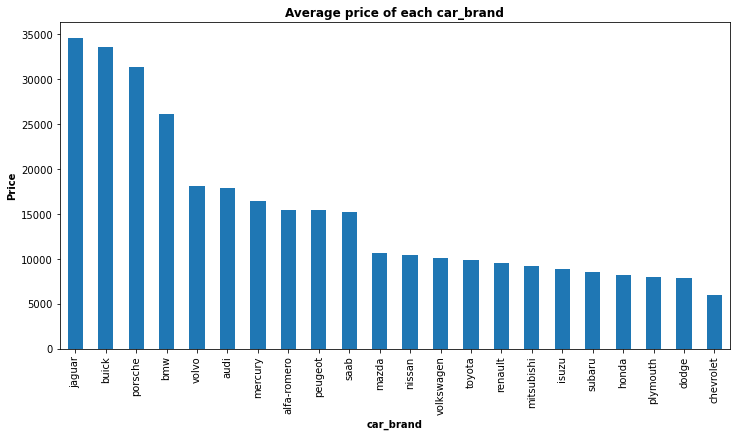

In [23]:
# average price of each car_brand
ds.groupby("car_brand")["price"].mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.title("Average price of each car_brand", fontweight="bold")
plt.ylabel("Price", fontweight="bold")
plt.xlabel("car_brand", fontweight="bold")
plt.show()

Jaguar, Buick, Porsche are the high priced car brands followed by BMW.

Chevrolet is the cheapest car brand.

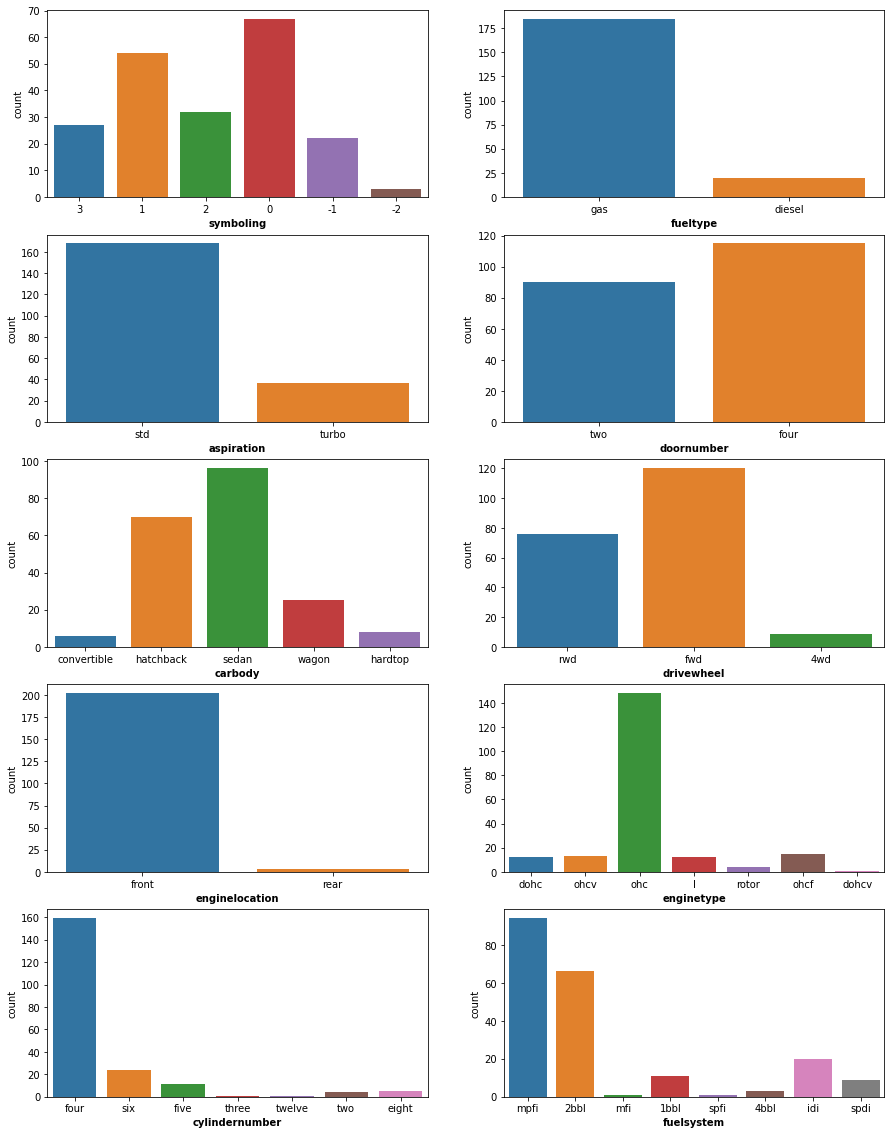

In [25]:
# visualizing the other categorical variables
plt.figure(figsize=(15,20))
for i,col in enumerate(col_categorical[:-2], start=1):
    plt.subplot(5,2,i)
    sns.countplot(ds[col])
    plt.xlabel(col, fontweight="bold")
plt.show()

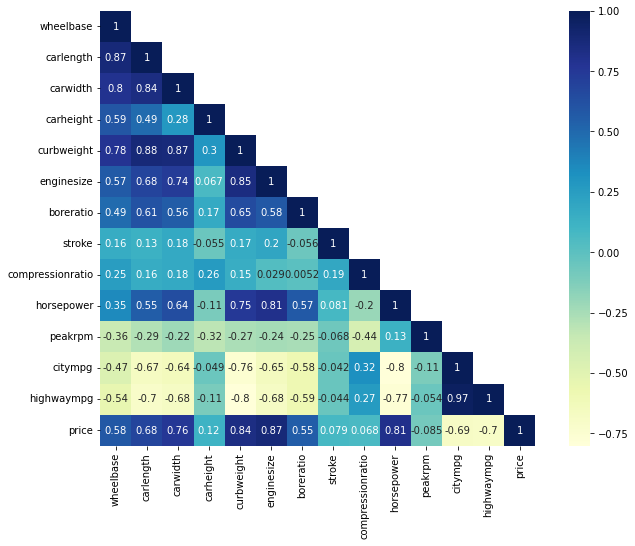

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(ds.corr(), cmap="YlGnBu", annot= True, square=True, mask=np.triu(ds.corr(),k=1))
plt.show()

1.curbweight and carlegth has the highest correlation of 0.88.

2.lowest correlation in the dataset is -0.8 for citympg & horsepower, and highwaympg & curbweight.

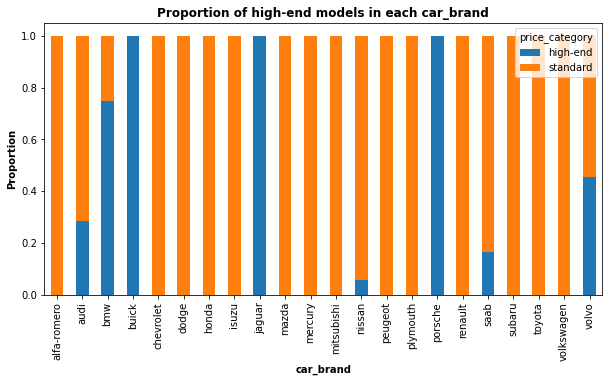

In [27]:
# proportion of high-end models in each car_brand
pd.crosstab(ds["car_brand"], ds["price_category"], normalize="index").plot.bar(stacked=True, figsize=(10,5))
plt.xlabel("car_brand", fontweight="bold")
plt.ylabel("Proportion", fontweight="bold")
plt.title("Proportion of high-end models in each car_brand", fontweight="bold")
plt.show()

Buick, Jaguar and Porsche has only high end model of cars.

# Data preperation



In [28]:
# removing the features which are negatively corelated
ds.drop(columns="citympg" , inplace = True)
ds.drop(columns="highwaympg", inplace = True)

In [29]:
# converting categorical variables into numeric variables using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

ds_encoded = ds.drop(columns=["price_category"])
ds_encoded[col_categorical[:-1]] = ds_encoded[col_categorical[:-1]].apply(lambda col: le.fit_transform(col))

ds_encoded.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_brand
0,5,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,13495.0,0
1,5,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,16500.0,0
2,3,1,0,1,2,2,0,94.5,171.2,65.5,...,3,152,5,2.68,3.47,9.0,154,5000,16500.0,0
3,4,1,0,0,3,1,0,99.8,176.6,66.2,...,2,109,5,3.19,3.40,10.0,102,5500,13950.0,1
4,4,1,0,0,3,0,0,99.4,176.6,66.4,...,1,136,5,3.19,3.40,8.0,115,5500,17450.0,1


# Defining the inputs and outputs

In [30]:
pd.DataFrame(ds.columns)

,0
0,symboling
1,fueltype
2,aspiration
3,doornumber
4,carbody
5,drivewheel
6,enginelocation
7,wheelbase
8,carlength
9,carwidth


In [31]:
X = ds_encoded.drop(columns="price")
y = ds_encoded["price"]

In [32]:
pd.DataFrame(X.columns)

,0
0,symboling
1,fueltype
2,aspiration
3,doornumber
4,carbody
5,drivewheel
6,enginelocation
7,wheelbase
8,carlength
9,carwidth


In [33]:
X.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'car_brand'],
      dtype='object')

# Splitting to test and train data

In [34]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = regressor.predict(X_test)
y_pred

array([25735.20910387, 17879.25373423,  9725.94976323, 13389.67597779,
       26130.53039877,  6396.24045342,  8060.63923736,  5641.71211816,
        9526.4746052 ,  6655.7401953 , 13439.7885315 ,  5880.06145413,
       16122.05964691, 10487.98255904, 39862.82149266,  6082.25598443,
        1128.8415333 , 14472.67953359,  9444.18660332, 10305.57494606,
       11231.0595065 , 20841.90703386,  7799.65878731,  4556.35615976,
        7478.72905324, 24854.26806203, 13782.26129298, 15890.78360902,
        5400.1253357 , 16541.42485082, 26141.14072444,  6801.30628761,
        4368.98482324, 21742.87400408,  7863.43371998, 26535.33659383,
       10290.61939272,  9550.43718748,  7367.25284174, 14739.27198515,
        7608.53601353])

In [37]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

-78865.52078715581
[ 1.30711781e+02  1.06710994e+04  1.01585214e+03 -1.35553520e+03
 -1.13532821e+03  6.80332163e+02  1.18691063e+04  1.55603460e+02
 -3.19922786e+01  5.89554658e+02  1.99545137e+02  2.91795143e+00
  2.84661694e+02 -1.34470313e+02  7.35197841e+01  1.68345166e+02
 -4.77703146e+02 -1.94479497e+03  8.66517951e+02  2.46545326e+01
  1.16810388e+00 -1.94284005e+02]


In [38]:
from sklearn import metrics
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R sqaure :',metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 3433.2213322367584
R sqaure : 0.8506915585906922
